<a href="https://colab.research.google.com/github/kalcon02/IS_4487_Tokyo/blob/main/Copy_of_day3_lab_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [2]:
# your code goes here
import pandas as pd

# Load Data

In [3]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [4]:
# Your code goes here
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [5]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [7]:
ss.tail(5)

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
56040,74084,2022-06-29,2022-06,Ian Rogers,Port Mark,ALABAMA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56041,74062,2022-06-29,2022-06,Marcus Anderson,West Aprilfurt,NEBRASKA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56042,74065,2022-06-29,2022-06,Nathaniel Howard,New Lindaview,ILLINOIS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56043,74038,2022-06-29,2022-06,Robin Sanz,West Frankhaven,ARKANSAS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56044,74110,2022-06-30,2022-06,Mallory Jimenez,Dillonhaven,MARYLAND,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [5]:
# Drop NAs
ss_filtered = ss.dropna()

In [13]:
# Search for and filter outliers
ss.describe()
ss_filtered = ss[ss['quantity'] <= 100]
ss_filtered = ss_filtered[ss_filtered['product_price'] <= 2000]

In [7]:
# create total_purchase
ss['total_purchase'] = ss['quantity'] * ss['product_price']

Check that your cleaning worked

In [8]:
# your code goes here
ss_filtered.describe()

,order_id,quantity,product_price
count,47008.000000,47008.000000,47008.000000
mean,62468.286547,1.570222,329.512974
std,6879.713096,0.622478,402.550542
min,45080.000000,1.000000,2.290000
25%,56594.750000,1.000000,4.990000
50%,62479.000000,1.000000,53.990000
75%,68368.250000,2.000000,609.630000
max,74147.000000,5.000000,1700.990000


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [16]:
ss['order_date'] = pd.to_datetime(ss['order_date'], errors='coerce')

# Filter out orders before 2020
ss_filtered = ss[(ss['order_date'].dt.year >= 2020) & (ss['order_date'].dt.year <= 2023)]


In [17]:
# average price


ss_filtered['order_date'] = pd.to_datetime(ss['order_date'], errors='coerce')

# Extract year and month from 'order_date'
ss_filtered['order_year_month'] = ss['order_date'].dt.to_period('M')

# Calculate the average price per year-month
average_price_per_month = ss_filtered.groupby('order_year_month')['product_price'].mean()

print(average_price_per_month)

order_year_month
2020-01    3172.420978
2020-02    3217.667212
2020-03    3242.706768
2020-04    3194.646275
2020-05    3192.571359
2020-06    3151.209623
2020-07    1959.974251
2020-08    1921.246151
2020-09    1740.987143
2020-10    1800.830762
2020-11    1693.386178
2020-12    1716.205675
2021-01    1774.621612
2021-02    1763.226404
2021-03    1761.580940
2021-04    1691.161107
2021-05    1643.897690
2021-06    1696.822340
2021-07    4284.421507
2021-08    6573.423124
2021-09    7086.669690
2021-10    6647.267347
2021-11    6727.223221
2021-12    6001.624570
2022-01    6537.449793
2022-02    6805.364523
2022-03    5851.014440
2022-04    6467.757094
2022-05    7108.572205
2022-06    6955.332040
Freq: M, Name: product_price, dtype: float64


<ipython-input-17-636186da1ec9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['order_date'] = pd.to_datetime(ss['order_date'], errors='coerce')
<ipython-input-17-636186da1ec9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['order_year_month'] = ss['order_date'].dt.to_period('M')


In [10]:
# total revenue
total_revenue_per_month = ss.groupby('order_year_month')['total_purchase'].sum()

print(total_revenue_per_month)

order_year_month
1922-06      979559.95
2020-01     4745149.93
2020-02      530915.09
2020-03      710043.07
2020-04      651707.84
2020-05      657669.70
2020-06      668056.44
2020-07      484113.64
2020-08      534106.43
2020-09      341233.48
2020-10      401585.26
2020-11      323436.76
2020-12      559483.05
2021-01      429458.43
2021-02      470781.45
2021-03      468580.53
2021-04      488745.56
2021-05      540842.34
2021-06      529408.57
2021-07    10495978.77
2021-08    47239239.96
2021-09    50625473.56
2021-10    53123132.48
2021-11    50213508.07
2021-12    60364261.25
2022-01    58216747.14
2022-02    58175468.30
2022-03    57460161.50
2022-04    63217187.94
2022-05    73964841.92
2022-06    67965140.91
2029-06          19.55
2029-07      517358.82
2029-08          39.94
2421-09       32051.29
Name: total_purchase, dtype: float64


# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

<Axes: xlabel='quantity', ylabel='product_price'>

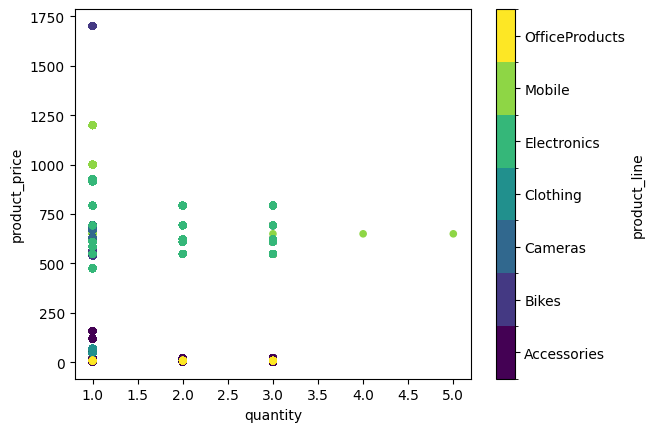

In [14]:
# Your code goes here.  Plot 1
ss_filtered["product_line"] = ss_filtered["product_line"].astype("category")
ss_filtered.plot(kind = "scatter", x = 'quantity',y = 'product_price',c = 'product_line', cmap='viridis')

It seems like the product price has little to no correlation with how many products are ordered.

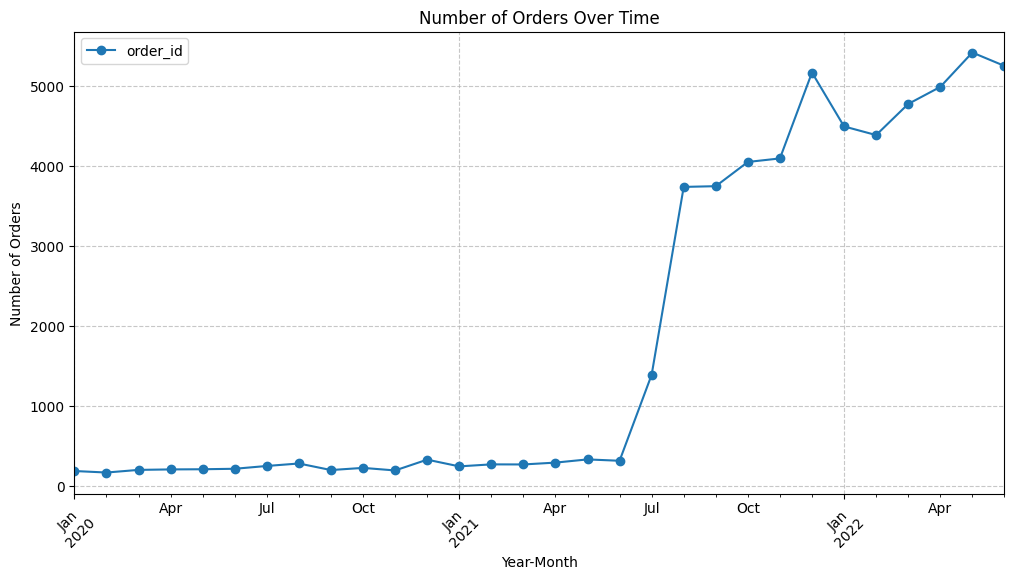

In [18]:
# Your code goes here.  Plot 1
import pandas as pd
import matplotlib.pyplot as plt
orders_over_time = ss_filtered.groupby('order_year_month')['order_id'].count().reset_index()

ax = orders_over_time.plot(x='order_year_month', y='order_id', kind='line', figsize=(12, 6), marker='o')

ax.set_title('Number of Orders Over Time')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of Orders')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.7)


This graph shows the relationship between the amount of purchases during each month. It seems like there was a steady amount of purchases from january 2020 but to around June 2021 is when the amount of orders starts to skyrocket and seems to reach the peach sales around April of 2022.